### 그래프를 엑셀 파일에 넣기

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

sales = {'시간': [9, 10, 11, 12, 13, 14, 15],
         '제품1': [10, 15, 12, 11, 12, 14, 13],
         '제품2': [9, 11, 14, 12, 13, 10, 12]}

df = pd.DataFrame(sales, index = sales['시간'], columns = ['제품1', '제품2'])
df.index.name = '시간' #index 라벨 추가

df

,제품1,제품2
시간,,
9,10,9
10,15,11
11,12,14
12,11,12
13,12,13
14,14,10
15,13,12


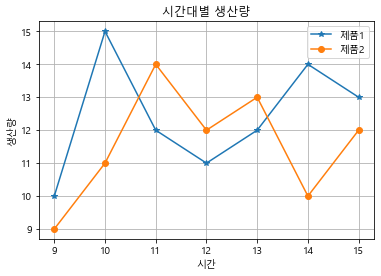

In [2]:
import matplotlib
import pandas as pd

matplotlib.rcParams['font.family'] = 'Malgun Gothic'# '맑은 고딕'으로 설정 
matplotlib.rcParams['axes.unicode_minus'] = False

product_plot = df.plot(grid = True, style = ['-*', '-o'], title='시간대별 생산량')
product_plot.set_ylabel("생산량")

image_file = 'C:/myPyCode/figures/fig_for_excel1.png' # 이미지 파일 경로 및 이름
plt.savefig(image_file, dpi = 400) # 그래프를 이미지 파일로 저장

plt.show()

In [3]:
import pandas as pd

# (1) pandas의 ExcelWriter 객체 생성
excel_file = 'C:/myPyCode/data/data_image_to_excel.xlsx'
excel_writer = pd.ExcelWriter(excel_file, engine='xlsxwriter')

# (2) DataFrame 데이터를 지정된 엑셀 시트(Sheet)에 쓰기
df.to_excel(excel_writer, index=True, sheet_name='Sheet1')

# (3) ExcelWriter 객체에서 워크시트(worksheet) 객체 생성
worksheet = excel_writer.sheets['Sheet1']

# (4) 워크시트에 차트가 들어갈 위치를 지정해 이미지 넣기
worksheet.insert_image('D2', image_file, {'x_scale': 0.7, 'y_scale': 0.7})
# worksheet.insert_image(1, 3, image_file, {'x_scale': 0.7, 'y_scale': 0.7})

# (5) ExcelWriter 객체를 닫고 엑셀 파일 출력
excel_writer.save()

In [4]:
# (1) pandas의 ExcelWriter 객체 생성
excel_chart = pd.ExcelWriter('C:/myPyCode/data/data_chart_in_excel.xlsx', engine='xlsxwriter')

# (2) DataFrame 데이터를 지정된 엑셀 시트(Sheet)에 쓰기
df.to_excel(excel_chart, index=True, sheet_name='Sheet1')

# (3) ExcelWriter 객체에서 워크북(workbook)과 워크시트(worksheet) 객체 생성
workbook  = excel_chart.book
worksheet = excel_chart.sheets['Sheet1']

# (4) 차트 객체 생성(원하는 차트의 종류 지정)
chart = workbook.add_chart({'type': 'line'})

# (5) 차트 생성을 위한 데이터값의 범위 지정 
chart.add_series({'values': '=Sheet1!$B$2:$B$8'})
chart.add_series({'values': '=Sheet1!$C$2:$C$8'})

# (6) 워크시트에 차트가 들어갈 위치를 지정해 차트 넣기
worksheet.insert_chart('D2', chart)

# (7) ExcelWriter 객체를 닫고 엑셀 파일 출력
excel_chart.save()

In [5]:
# (1) pandas의 ExcelWriter 객체 생성
excel_chart = pd.ExcelWriter('C:/myPyCode/data/data_chart_in_excel.xlsx', engine='xlsxwriter')

# (2) DataFrame 데이터를 지정된 엑셀 시트(Sheet)에 쓰기
df.to_excel(excel_chart, index=True, sheet_name='Sheet1')

# (3) ExcelWriter 객체에서 워크북(workbook)과 워크시트(worksheet) 객체 생성
workbook  = excel_chart.book
worksheet = excel_chart.sheets['Sheet1']

# (4) 차트 객체 생성(원하는 차트의 종류 지정)
chart = workbook.add_chart({'type': 'line'})

# (5) 차트 생성을 위한 데이터값의 범위 지정
chart.add_series({'values': '=Sheet1!$B$2:$B$8', 
                  'categories': '=Sheet1!$A$2:$A$8',
                  'name': '=Sheet1!$B$1',})

chart.add_series({'values': '=Sheet1!$C$2:$C$8', 
                  'categories': '=Sheet1!$A$2:$A$8',
                  'name': '=Sheet1!$C$1',})

# (6) 워크시트에 차트가 들어갈 위치를 지정해 차트 넣기
worksheet.insert_chart('D2', chart)

# (7) ExcelWriter 객체를 닫고 엑셀 파일 출력
excel_chart.save()

In [7]:
# (1) pandas의 ExcelWriter 객체 생성
excel_chart = pd.ExcelWriter('C:/myPyCode/data/data_chart_in_excel.xlsx', engine='xlsxwriter')

# (2) DataFrame 데이터를 지정된 엑셀 시트(Sheet)에 쓰기
df.to_excel(excel_chart, index=True, sheet_name='Sheet1')

# (3) ExcelWriter 객체에서 워크북(workbook)과 워크시트(worksheet) 객체 생성
workbook  = excel_chart.book
worksheet = excel_chart.sheets['Sheet1']

# (4) 차트 객체 생성(원하는 차트의 종류 지정)
chart = workbook.add_chart({'type': 'line'})

# (5) 차트 생성을 위한 데이터값의 범위 지정
chart.add_series({'values': '=Sheet1!$B$2:$B$8', 
                  'categories': '=Sheet1!$A$2:$A$8',
                  'name': '=Sheet1!$B$1',})

chart.add_series({'values': '=Sheet1!$C$2:$C$8', 
                  'categories': '=Sheet1!$A$2:$A$8',
                  'name': '=Sheet1!$C$1',})

# (5-1) 엑셀 차트에 x, y축 라벨과 제목 추가
chart.set_title ({'name': '시간대별 생산량'})
chart.set_x_axis({'name': '시간'})
chart.set_y_axis({'name': '생산량'})

# (6) 워크시트에 차트가 들어갈 위치를 지정해 차트 넣기
worksheet.insert_chart('D2', chart)

# (7) ExcelWriter 객체를 닫고 엑셀 파일 출력
excel_chart.save()